In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od

In [4]:
import pandas as pd
import numpy as np

In [5]:
od.download('https://www.kaggle.com/competitions/playground-series-s4e7')

Skipping, found downloaded files in "./playground-series-s4e7" (use force=True to force download)


In [6]:
os.listdir('playground-series-s4e7')

['sample_submission.csv', 'train.csv', 'test.csv']

In [7]:
data=pd.read_csv('/content/playground-series-s4e7/train.csv')
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [8]:
data.Response.value_counts()

,count
Response,
0,10089739
1,1415059


In [45]:
data.describe()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.413510e-01,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.015537e-01,4.973202e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,4.982872e-01,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,2.839280e-01,4.999928e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,0.000000e+00,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,1.000000e+00,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,5.000000e-01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,1.000000e+00,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,5.000000e-01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.000000e+00,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,1.000000e+00,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


In [9]:
test_data=pd.read_csv('/content/playground-series-s4e7/test.csv')
test_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [10]:
data=data.drop('id',axis=1)
test_data=test_data.drop('id',axis=1)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Gender                object 
 1   Age                   int64  
 2   Driving_License       int64  
 3   Region_Code           float64
 4   Previously_Insured    int64  
 5   Vehicle_Age           object 
 6   Vehicle_Damage        object 
 7   Annual_Premium        float64
 8   Policy_Sales_Channel  float64
 9   Vintage               int64  
 10  Response              int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 965.5+ MB


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7669866 entries, 0 to 7669865
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Gender                object 
 1   Age                   int64  
 2   Driving_License       int64  
 3   Region_Code           float64
 4   Previously_Insured    int64  
 5   Vehicle_Age           object 
 6   Vehicle_Damage        object 
 7   Annual_Premium        float64
 8   Policy_Sales_Channel  float64
 9   Vintage               int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 585.2+ MB


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
for i in data.select_dtypes(include='object').columns:
  print(i,data[i].unique())

Gender ['Male' 'Female']
Vehicle_Age ['1-2 Year' '> 2 Years' '< 1 Year']
Vehicle_Damage ['Yes' 'No']


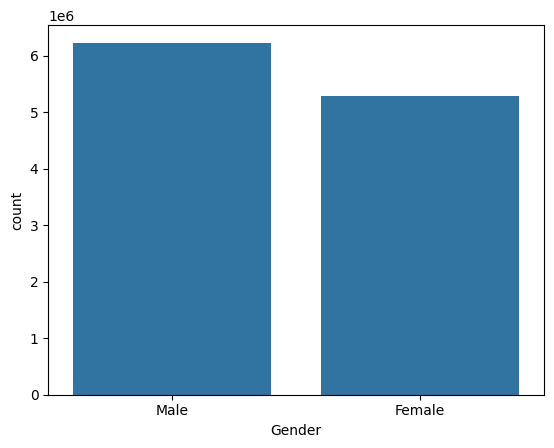

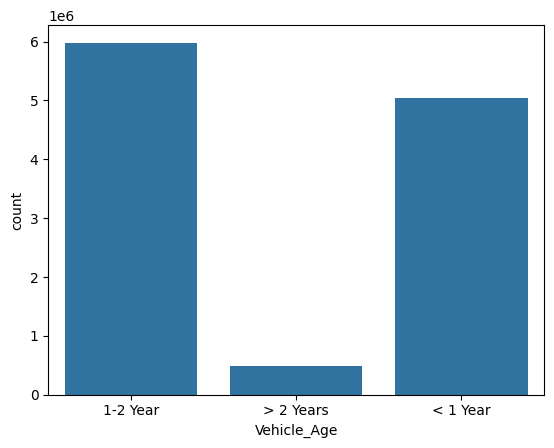

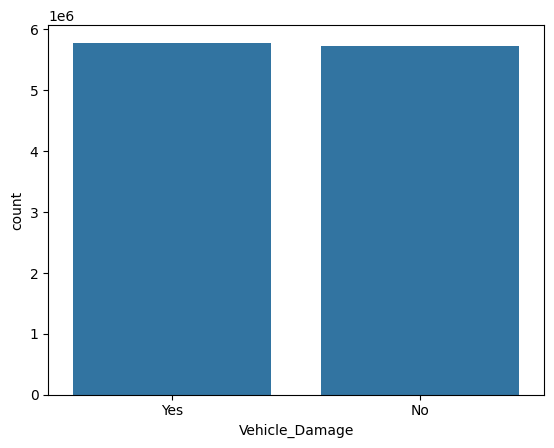

In [ ]:
for i in data.select_dtypes(include='object').columns:
  sns.countplot(data=data,x=i)
  plt.show()

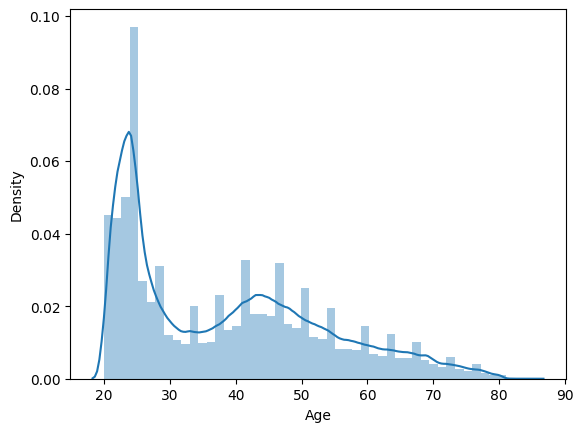

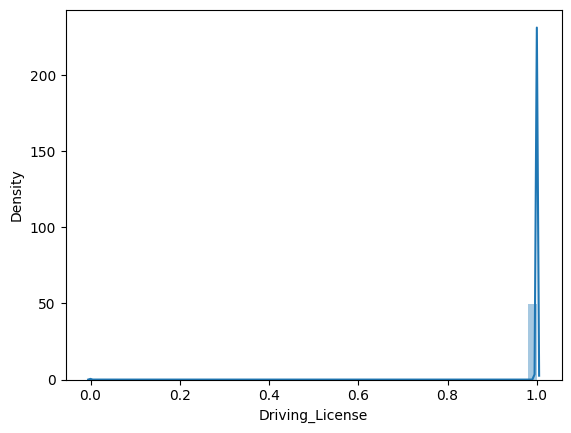

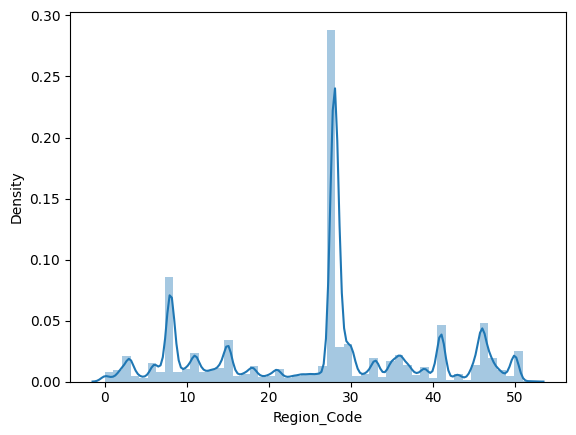

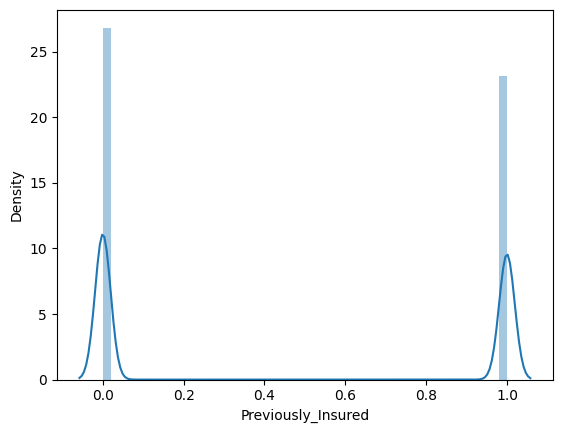

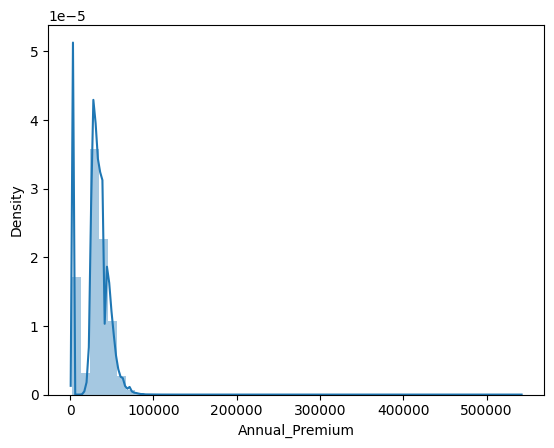

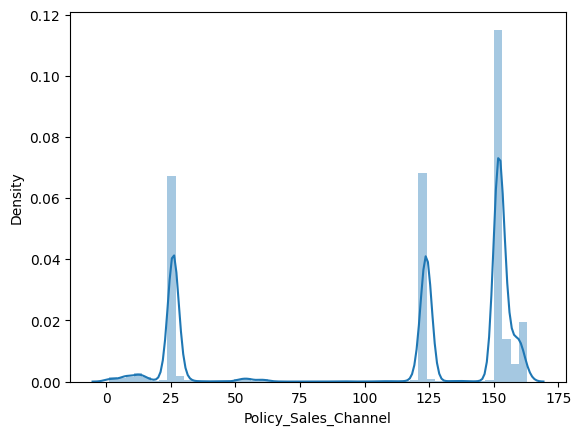

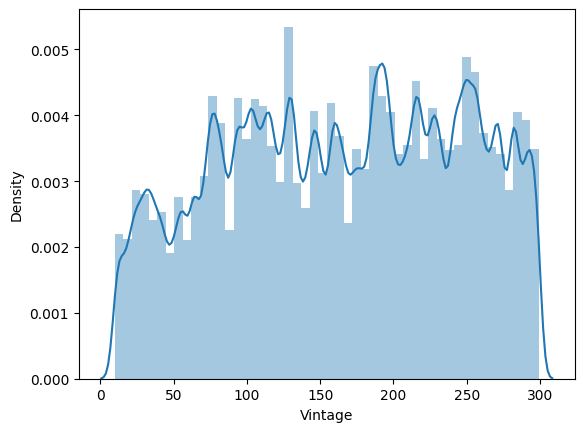

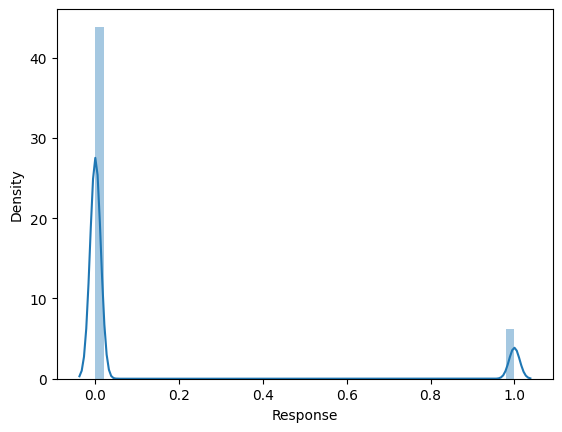

In [ ]:
for i in data.select_dtypes(include='number').columns:
  sns.distplot(data[i])
  plt.show()

In [14]:
gen={'Female':0,'Male':1}
data['Gender']=data['Gender'].map(gen)
test_data['Gender']=test_data['Gender'].map(gen)

In [15]:
dam={'Yes':0,'No':1}
data['Vehicle_Damage']=data['Vehicle_Damage'].map(dam)
test_data['Vehicle_Damage']=test_data['Vehicle_Damage'].map(dam)

In [16]:
age={'1-2 Year':0.5,'> 2 Years':1, '< 1 Year':0}
data['Vehicle_Age']=data['Vehicle_Age'].map(age)
test_data['Vehicle_Age']=test_data['Vehicle_Age'].map(age)

In [17]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,21,1,35.0,0,0.5,0,65101.0,124.0,187,0
1,1,43,1,28.0,0,1.0,0,58911.0,26.0,288,1
2,0,25,1,14.0,1,0.0,1,38043.0,152.0,254,0
3,0,35,1,1.0,0,0.5,0,2630.0,156.0,76,0
4,0,36,1,15.0,1,0.5,1,31951.0,152.0,294,0


In [18]:
test_data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,20,1,47.0,0,0.0,1,2630.0,160.0,228
1,1,47,1,28.0,0,0.5,0,37483.0,124.0,123
2,1,47,1,43.0,0,0.5,0,2630.0,26.0,271
3,0,22,1,47.0,1,0.0,1,24502.0,152.0,115
4,1,51,1,19.0,0,0.5,1,34115.0,124.0,148


In [19]:
x=data.drop('Response',axis=1)
y=data['Response']

In [48]:
x.corrwith(y)

,0
Gender,0.055212
Age,0.122134
Driving_License,0.009197
Region_Code,0.012816
Previously_Insured,-0.345930
Vehicle_Age,0.231029
Vehicle_Damage,-0.359780
Annual_Premium,0.032261
Policy_Sales_Channel,-0.152733
Vintage,-0.015177


In [20]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
test_data=pd.DataFrame(sc.transform(test_data),columns=test_data.columns)

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
x_train.shape

(9203838, 10)

In [36]:
x_train.head(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
2405201,0.0,0.323077,1.0,0.634615,0.0,0.5,0.0,0.067294,0.759259,0.525952
7069408,1.0,0.061538,1.0,0.942308,0.0,0.0,0.0,0.000000,0.932099,0.941176
1044712,1.0,0.292308,1.0,0.211538,0.0,0.5,0.0,0.053282,0.759259,0.757785
6286832,1.0,0.492308,1.0,0.153846,1.0,0.5,1.0,0.059092,0.154321,0.411765
5807645,0.0,0.753846,1.0,0.788462,1.0,0.5,1.0,0.052004,0.759259,0.356401


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [38]:
models=[LogisticRegression(),DecisionTreeClassifier()]

In [39]:
model=LogisticRegression(class_weight='balanced')
model.fit(x_train,y_train)
preds1=model.predict(x_test)
print(accuracy_score(y_test,preds1))
print(confusion_matrix(y_test,preds1))
print(classification_report(y_test,preds1))
preds=model.predict(test_data)

0.6417434462137542
[[1199194  818582]
 [   5752  277432]]
              precision    recall  f1-score   support

           0       1.00      0.59      0.74   2017776
           1       0.25      0.98      0.40    283184

    accuracy                           0.64   2300960
   macro avg       0.62      0.79      0.57   2300960
weighted avg       0.90      0.64      0.70   2300960



In [40]:
preds[:100]

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [41]:
sub=pd.read_csv('/content/playground-series-s4e7/sample_submission.csv')

In [42]:
sub.head(5)

,id,Response
0,11504798,0.5
1,11504799,0.5
2,11504800,0.5
3,11504801,0.5
4,11504802,0.5


In [43]:
sub['Response']=preds

In [44]:
sub.to_csv('sub.csv',index=False)